<B>The 6.3 Magnitude L'Aquila Earthquake on April 6, 2009 in Central Italy</B> This was a Mag-6.3 event which was preceded by a smaller 4.1 event about a week prior. Subsequent seismic activity followed for days with 2 notable ones being above a  Mag-5.0. The devastation was extensive as several buildings collapsed, property and infrastructure was damaged and a total of 308 people lost their lives.<img src=https://upload.wikimedia.org/wikipedia/commons/e/e2/20090406_013242_umbria_quake_intensity.jpg>

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

<b>SET SEARCH PARAMETERS HERE</b>
The following sets of code will set the variables for our earthquake catalogue search

In [7]:
maxrad = 1.0 
lon = 13.3800
lat = 42.3476
minmag = 2.0
startt = UTCDateTime("1999-04-06") 
endt = UTCDateTime("2009-04-06")

Now to get the events, this will take a few minutes

In [8]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

In [9]:
print (cat)

3644 Event(s) in Catalog:
2009-04-05T22:56:43.890000Z | +42.988,  +13.626 | 2.3  Ml
2009-04-05T22:39:42.840000Z | +42.339,  +13.376 | 3.3  mb
...
1999-04-10T20:23:24.900000Z | +42.691,  +13.236 | 2.1  MD
1999-04-06T14:45:42.900000Z | +43.038,  +12.874 | 2.2  MD
To see all events call 'print(CatalogObject.__str__(print_all=True))'


Create columns that will contain 2 data sets, Origin times and Magnitude. We will initiate them as empty lists using [] symbols and then loop through each event n the catalogue.

In [10]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
print (times[4],mags[4])

2009-04-03 05:48:03.500000 2.1


In [11]:
mtimes = mdates.date2num(times) 

In [12]:
print (mtimes[4],mags[4])

14337.241707175926 2.1


We will create a plot that shows the magnitude of all earthquakes in the catalogue over time

/tmp/ipykernel_2223/3582602023.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(mtimes,mags,marker='.')


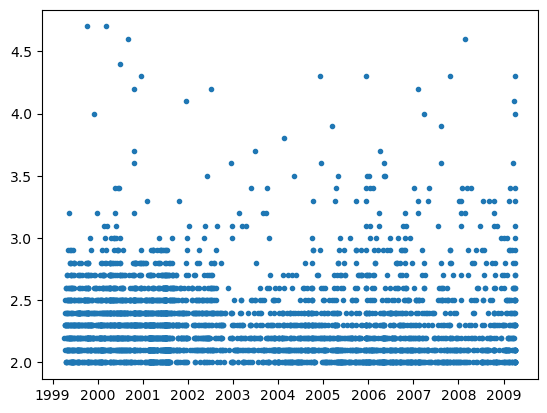

In [13]:
fig1 = plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.') 
plt.show()

AS observed, there was no usual seismic activity in the weeks leading up to the 2009 event

Let us take a closer look at the seimicity in the days leading up ot the event

(array([ 40.,  59.,  43.,  56.,  32.,  37.,  76.,  34.,  30.,  64.,  57.,
         36.,  81.,  62.,  61.,  55.,  47.,  31.,  85.,  36.,  34.,  45.,
         86.,  93.,  55.,  54., 139., 106.,  50.,  22.,  29.,  29.,  27.,
          6.,  21.,  27.,  22.,  32.,  28.,  29.,  13.,  20.,   9.,   2.,
         17.,  10.,  11.,  15.,   9.,  11.,  16.,   6.,  16.,  12.,  19.,
         24.,  21.,  20.,  23.,  24.,  20.,  16.,  26.,  21.,  31.,  31.,
         29.,  12.,  23.,  25.,  10.,  23.,  46.,  32.,  18.,  13.,  22.,
         26.,  20.,  15.,  61.,  35.,  27.,  16.,  47.,  33.,  24.,  38.,
         22.,  34.,  27.,  25.,  31.,  19.,  32.,  22.,  15.,   7.,  11.,
         13.,  25.,  21.,  21.,  18.,  19.,  16.,  10.,  11.,  12.,  10.,
          5.,  26.,  15.,  11.,  31.,   8.,  16.,  30.,  23.,  64.]),
 array([10687.61507986, 10718.05125473, 10748.48742959, 10778.92360445,
        10809.35977932, 10839.79595418, 10870.23212905, 10900.66830391,
        10931.10447877, 10961.54065364, 10991.

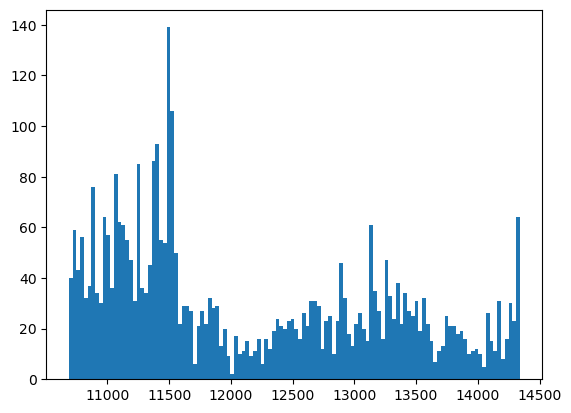

In [14]:
fig2, axes = plt.subplots(1,1) 
axes.hist(mtimes, bins=120)